In [1]:
#check the dataset present in the file
import os
print(os.listdir())

['.ipynb_checkpoints', 'housingData-Real.csv', 'test.ipynb']


In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
#import dataset
data = pd.read_csv('housingData-Real.csv')

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
#select your columns
livingspace = data['sqft_living']
price = data['price']

In [7]:
#convert livingspace into 20 matrix
X= np.array(livingspace).reshape(-1,1)


In [8]:
y = np.array(price)

In [9]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]], dtype=int64)

In [10]:
#convert the data into test and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33)


In [11]:
X_test

array([[2160],
       [1470],
       [1180],
       ...,
       [2410],
       [3110],
       [2990]], dtype=int64)

In [12]:
#pass the data in the linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
y_predictor = regressor.predict(X_test)

In [14]:
y_predictor

array([561331.12489355, 370266.57790588, 289964.08714295, ...,
       630557.410034  , 824391.00842729, 791162.39155987])

In [15]:
#this Prediction id more helpful with Graphs/plots


Text(0.5, 1.0, 'Training graph for Housing')

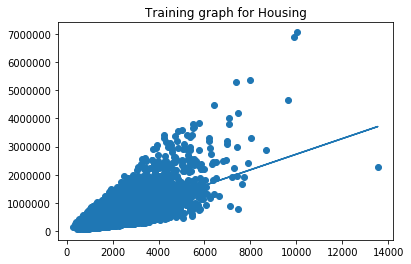

In [16]:
#plot for training dataset
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train))
plt.title('Training graph for Housing')

Text(0, 0.5, 'Pricing')

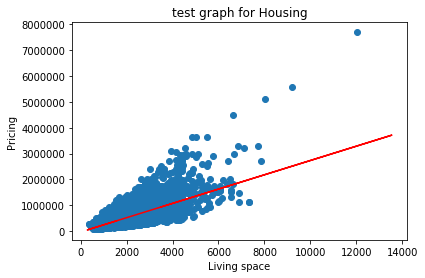

In [17]:
#plot the test dataset
plt.scatter(X_test,y_test)
plt.plot(X_train,regressor.predict(X_train),color = 'red')
plt.title('test graph for Housing')
plt.xlabel('Living space')
plt.ylabel('Pricing')


In [18]:
year = data['bedrooms']
price = data['price']

In [19]:
type(year)

pandas.core.series.Series

In [20]:
X = np.array(year).reshape(-1,1)

In [21]:
y =np.array(price)

In [22]:
X

array([[3],
       [3],
       [2],
       ...,
       [2],
       [3],
       [2]], dtype=int64)

In [23]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [25]:
X_train

array([[3],
       [3],
       [4],
       ...,
       [3],
       [5],
       [4]], dtype=int64)

In [26]:
y_train

array([315000., 499950., 410500., ..., 274500., 250000., 970000.])

In [27]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
predictor = regr.predict(X_test)

In [29]:
predictor

array([496424.93221742, 859310.46941614, 496424.93221742, ...,
       738348.62368323, 617386.77795033, 375463.08648451])

Text(0, 0.5, 'Price')

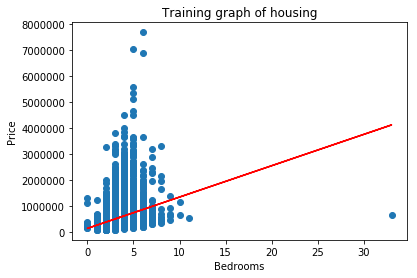

In [30]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regr.predict(X_train),color = 'red')
plt.title('Training graph of housing')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

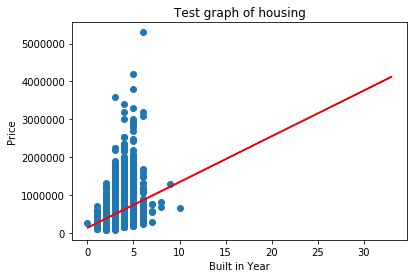

In [31]:
plt.scatter(X_test,y_test)
plt.plot(X_train,regr.predict(X_train),color = 'red')
plt.title('Test graph of housing')
plt.xlabel('Built in Year')
plt.ylabel('Price')

## Multiple Linear Regression


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [35]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [42]:
data['date']=pd.to_numeric(data['date'])

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null int64
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(16)
memory usage: 3.5 MB


In [74]:
y=data.iloc[:,[2]].values
X=data.iloc[:,[x for x in range(21) if x!=2]].values

In [75]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [77]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [78]:
y_predictor = regressor.predict(X_test)

In [79]:
y_predictor

array([[403847.71],
       [200043.68],
       [211927.87],
       ...,
       [377598.95],
       [383542.66],
       [345950.07]])

In [72]:
print(y_test,y_predictor
     )

           price
1415    445000.0
1173    359000.0
19570   619790.0
1606    780000.0
17735   355000.0
15993   762450.0
19980   415000.0
6828    657500.0
10533   405000.0
3415    400000.0
4840    950000.0
7311   2500000.0
2591    375000.0
14061   284000.0
14272   475000.0
3972    375000.0
10364   536500.0
7413    294000.0
1207    651000.0
16874   649800.0
9182    400000.0
10483   250000.0
3483    209950.0
2493    195000.0
12776   510000.0
13163  1250000.0
3812    750000.0
2033    350000.0
17031   385000.0
12339   415000.0
...          ...
16229   710000.0
2928    500000.0
2807    522000.0
16528   725000.0
18740   685000.0
682     609900.0
2861    443000.0
8819   1005000.0
7150    255000.0
21578   362500.0
18741   488000.0
20374   494815.0
4753    528000.0
8174   1625000.0
4116    470000.0
18366   975000.0
2212    550000.0
10211   215000.0
10341   785000.0
14137   295000.0
13929   409950.0
17641   507000.0
10304   601000.0
13259   430000.0
11165   850000.0
20046   498000.0
20721   507950

In [80]:
np.set_printoptions(precision =2)
print(np.concatenate((y_predictor.reshape(len(y_predictor),1),y_test.reshape(len(y_test),1)), 1))

[[403847.71 286500.  ]
 [200043.68 269000.  ]
 [211927.87 518000.  ]
 ...
 [377598.95 325000.  ]
 [383542.66 350000.  ]
 [345950.07 300000.  ]]


In [82]:
regressor.coef_

array([[-1.19e-06,  8.54e-13,  2.53e+00, -2.06e+01,  1.65e+02,  1.05e-01,
        -1.53e+01,  2.18e-01,  5.30e+00,  2.11e+01, -1.79e+01,  9.48e+01,
         7.04e+01, -2.34e+03,  4.45e+01,  3.62e+02,  1.46e+00, -2.55e+00,
         9.90e+01, -8.35e-01]])

In [83]:
regressor.intercept_

array([-32278188.08])

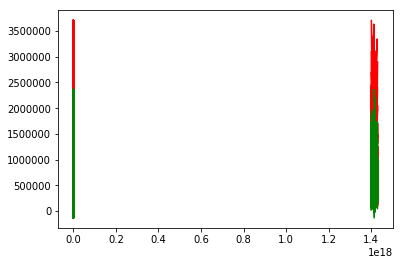

In [84]:
plt.plot(X_test,y_test,color = 'red')
plt.plot(X_test,y_predictor,color = 'green')